# Importing necessary **libraries**


In [1]:
#ml libs
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# **Importing Data from  "SWELL-KW" Dataset.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
trainFile = pd.read_csv('/content/drive/MyDrive/train.csv').drop(columns="datasetId")
testFile = pd.read_csv('/content/drive/MyDrive/test.csv').drop(columns="datasetId")

In [6]:
trainFile.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,no stress


In [8]:
trainFile['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

# **Encoding classification labels in "Condition" column**

In [9]:
conditions = dict(trainFile['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)
plt.show()
#plt.savefig('D:/PFE/EngineeringThesis/Classification labels.PNG')


In [10]:
le = preprocessing.LabelEncoder()
le.fit(trainFile['condition'])
trainFile['condition'] = le.transform(trainFile['condition'])
testFile['condition'] = le.transform(testFile['condition'])

# **Plotting Pearson's Correlation Matrix to check dependency of variables**

In [12]:
plt.figure(figsize=(12,10))
corr = trainFile.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()
#plt.savefig('D:/PFE/EngineeringThesis/CorrMatrix')

# **Defining a feature selection function**

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = trainFile.columns[columns]
#data = trainFile[selected_columns]

In [14]:
selected_columns

Index(['MEAN_RR', 'SDRR', 'RMSSD', 'HR', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT',
       'LF_PCT', 'LF_NU', 'HF_PCT', 'LF_HF', 'sampen', 'higuci', 'condition'],
      dtype='object')

# plot graph of feature importances for better visualization

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X_train=trainFile[['MEAN_RR', 'SDRR', 'RMSSD', 'HR', 'pNN50', 'KURT', 'SKEW',
       'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT',
       'LF_PCT', 'LF_NU', 'HF_PCT', 'LF_HF']]
y_train=trainFile['condition']
model3 = ExtraTreesClassifier()
model3.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

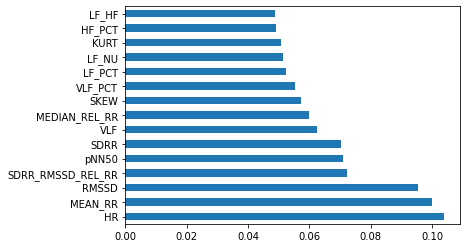

<Figure size 108000x57600 with 0 Axes>

In [ ]:

#plot graph of feature importances for better visualization
feature_importances_= pd.Series(model3.feature_importances_, index=X_train.columns)
feature_importances_.nlargest(60).plot(kind='barh')
plt.figure(figsize=(1500,800))
plt.show()

In [15]:
X_train = trainFile[['MEAN_RR', 'SDRR', 'RMSSD', 'HR', 'pNN50', 'KURT', 'SKEW','MEAN_REL_RR',
        'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT',
       'LF_PCT', 'LF_NU', 'HF_PCT', 'LF_HF']].to_numpy() #
y_train = trainFile['condition'].to_numpy()
X_test=testFile[['MEAN_RR', 'SDRR', 'RMSSD', 'HR', 'pNN50', 'KURT', 'SKEW','MEAN_REL_RR',
        'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT',
       'LF_PCT', 'LF_NU', 'HF_PCT', 'LF_HF']].to_numpy()
y_test = testFile['condition'].to_numpy()


# **Plotting some of the extracted features**


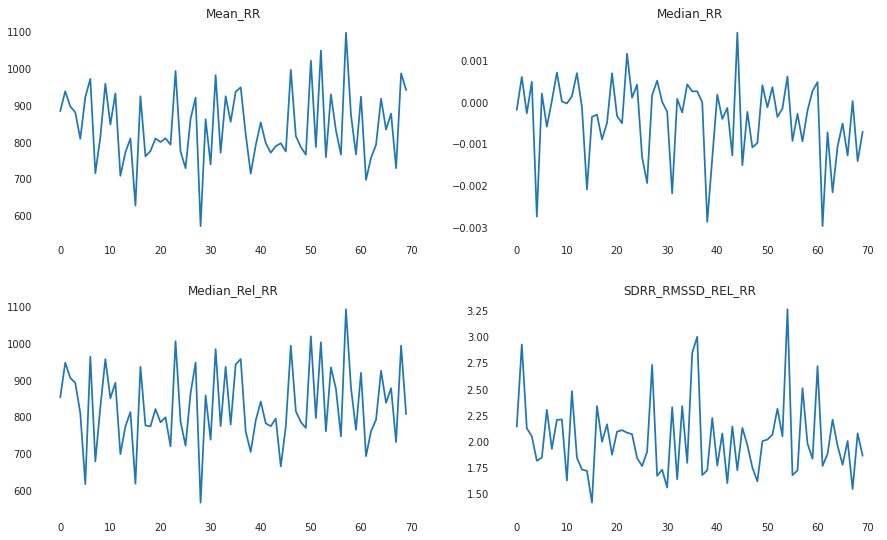

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
reduced_train['MEDIAN_REL_RR'][:70].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("Median_Rel_RR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

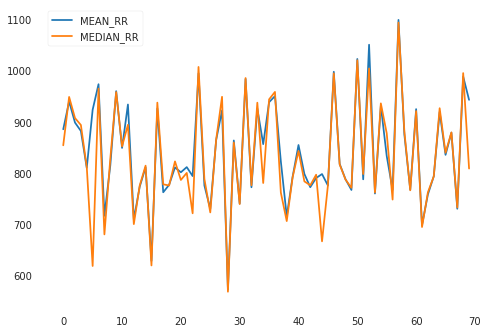

In [ ]:
reduced_train[['MEAN_RR','MEDIAN_RR']][:70].plot()


In [ ]:
#normalizing features
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)#train_samples)
X_test = scaler.fit_transform(X_test)

In [ ]:
#one-hot-encoding labels
one_hot_encoder = OneHotEncoder(categories='auto')
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot_encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

## **Defining a "ANN" model and training it**



In [ ]:
model = Sequential([
    Dense(16 , kernel_initializer='glorot_uniform', input_shape=[16,], activation='relu'),
   #keras.layers.Dropout(0.2),
  Dense(14 , kernel_initializer='glorot_uniform', activation='relu'),
    Dense(12 , kernel_initializer='glorot_uniform', activation='relu'),
    Dense(10, kernel_initializer='glorot_uniform', activation='relu'),
    #keras.layers.Dropout(0.2),
     Dense(8, kernel_initializer='glorot_uniform', activation='relu'),
    Dense(6, kernel_initializer='glorot_uniform', activation='relu'),
     #keras.layers.Dropout(0.2),
    Dense(3, kernel_initializer='glorot_uniform', activation='softmax')
])

In [ ]:
model.compile(Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=500, shuffle=True, verbose=2)

Epoch 1/500
2597/2597 - 5s - loss: 0.6883 - accuracy: 0.6969 - val_loss: 0.5480 - val_accuracy: 0.7658
Epoch 2/500
2597/2597 - 4s - loss: 0.4769 - accuracy: 0.8012 - val_loss: 0.4431 - val_accuracy: 0.8238
Epoch 3/500
2597/2597 - 3s - loss: 0.3884 - accuracy: 0.8424 - val_loss: 0.3541 - val_accuracy: 0.8599
Epoch 4/500
2597/2597 - 3s - loss: 0.3413 - accuracy: 0.8650 - val_loss: 0.3157 - val_accuracy: 0.8791
Epoch 5/500
2597/2597 - 3s - loss: 0.3078 - accuracy: 0.8806 - val_loss: 0.2909 - val_accuracy: 0.8890
Epoch 6/500
2597/2597 - 3s - loss: 0.2769 - accuracy: 0.8927 - val_loss: 0.2756 - val_accuracy: 0.8918
Epoch 7/500
2597/2597 - 3s - loss: 0.2539 - accuracy: 0.9010 - val_loss: 0.2493 - val_accuracy: 0.9055
Epoch 8/500
2597/2597 - 3s - loss: 0.2386 - accuracy: 0.9079 - val_loss: 0.2607 - val_accuracy: 0.8977
Epoch 9/500
2597/2597 - 4s - loss: 0.2255 - accuracy: 0.9136 - val_loss: 0.2064 - val_accuracy: 0.9223
Epoch 10/500
2597/2597 - 3s - loss: 0.2126 - accuracy: 0.9192 - val_loss:

In [ ]:
model.evaluate(X_train,y_train)

11541/11541 [==============================] - 12s 1ms/step - loss: 0.0273 - accuracy: 0.9904


[0.027343519032001495, 0.9904491901397705]

In [ ]:
data = trainFile[['MEAN_RR', 'SDRR', 'RMSSD', 'HR', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT', 'LF_PCT', 'LF_NU', 'HF',
       'HF_PCT', 'HF_NU', 'LF_HF']]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 14)                238       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                180       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
y_predict=model.predict(X_test)
print(y_predict[:10])

[[1.3535490e-16 1.0000000e+00 5.3556645e-21]
 [1.7646947e-08 9.0453742e-11 1.0000000e+00]
 [7.2405172e-11 1.0000000e+00 2.5393887e-14]
 [1.8640521e-05 9.9997628e-01 5.0920899e-06]
 [9.6726716e-01 3.2732882e-02 8.0694562e-11]
 [3.0906276e-12 1.5470830e-03 9.9845290e-01]
 [1.0000000e+00 9.9075725e-10 1.5083588e-15]
 [2.9028335e-11 1.0000000e+00 5.8546669e-29]
 [1.0000000e+00 8.9435421e-18 1.1029567e-25]
 [1.6388410e-35 1.0000000e+00 2.7770488e-23]]


In [ ]:
y_predict=np.round(y_predict)
print(y_predict[20:30])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
print(y_test[20:30])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


# **Printing the model performance and classification report**

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11782
           1       0.98      0.99      0.98     22158
           2       0.98      0.95      0.96      7093

   micro avg       0.98      0.98      0.98     41033
   macro avg       0.98      0.97      0.98     41033
weighted avg       0.98      0.98      0.98     41033
 samples avg       0.98      0.98      0.98     41033



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('D:/finalmodel.h5')  # creates a HDF5 file 'finalmodel.h5'

In [ ]:
model2 = keras.models.load_model('D:/PFE/firstTry/finalmodel.h5')

In [ ]:
y_predict=model2.predict(X_test)

In [ ]:
y_predict=np.round(y_predict)
print(y_predict[20:30])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
data=[[0.9183902375259865, 0.038438923886373495, 0.025921727119857917, 65.44908507261927, 0.06707317073170732, 0.26806256260156314, -0.5422107775094281, 9.905647789591628e-05, 0.0, 0.6853236752263312, 0.0004288691011044008, 33.79233693032387, 55.69638383703527, 84.12377246788047, 10.511279232640861, 5.298725550366915]]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X_test = scaler.fit_transform(data)
model = keras.models.load_model('D:/finalmodel.h5')
y_predict=model.predict(X_test)
print(y_predict)
y_predict=np.round(y_predict)
print(y_predict)

[[6.6607511e-01 5.6782621e-04 3.3335707e-01]]
[[1. 0. 0.]]


In [ ]:
trainFile.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
condition            0
dtype: int64